In [ ]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
# importing dataset
df=pd.read_csv('/content/MLTollsStackOverflow.csv',parse_dates=['month'])
df.head()

,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,pandas,pytorch,keras,nlp,apache-spark,hadoop,pyspark,python-3.x,tensorflow,deep-learning,neural-network,lstm,time-series,pillow,rasa,opencv,pipenv,seaborn,Dask,jupyter,AllenNLP,Theano,plotly,scikit-learn,BeautifulSoup,scrapy,Gensim,FastText,Pydot,Pybrain,...,Colab,Shogun,KNIME,Apache,Gunicorn,Pygtk,Weka,Conda,Ray,matlab.1,accord.net,regression,classification,correlation,cluster-analysis,H2o,Mallet,Numba,Tableau,Trifacta,PyArrow,Rasterio,Orange3,PyMC3,Opennn,Oryx,Istio,Venes,Plotnine,Gluon,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
0,09-Jan,0,0,0,631,8,6,2,19,8,0,0,0,8,0,1,0,4,0,0,4,0,1,0,0,3,0,0,0,0,0,0,0,0,5,0,0,0,0,0,...,0,0,0,95,0,3,0,0,0,19,0,1,2,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,5,0,0
1,09-Feb,1,0,0,633,9,7,3,27,4,0,0,0,9,0,1,0,12,0,0,4,0,2,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,0,0,...,0,0,0,114,0,7,0,0,0,27,0,3,4,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,11,0,0
2,09-Mar,0,0,0,766,4,4,2,24,3,0,0,0,12,0,1,0,4,0,0,11,0,1,0,0,7,0,0,0,0,0,0,0,0,8,0,0,0,0,0,...,0,0,0,104,0,6,0,0,0,24,0,0,0,0,4,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,2,0,0
3,09-Apr,0,0,0,768,12,6,3,32,10,0,0,0,14,0,6,0,10,0,0,6,0,0,0,0,8,0,0,0,0,0,0,0,0,3,0,0,0,0,0,...,0,0,0,111,0,3,0,0,0,32,0,0,4,0,2,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,5,0,0
4,09-May,1,0,0,1003,2,7,2,42,7,0,0,0,9,0,3,0,19,0,0,7,0,0,0,0,10,0,0,0,0,0,0,0,0,14,0,0,0,0,0,...,0,0,0,127,0,5,0,0,0,42,0,2,0,0,6,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,3,0,0


In [ ]:
df['month']

0      09-Jan
1      09-Feb
2      09-Mar
3      09-Apr
4      09-May
        ...  
127    19-Aug
128    19-Sep
129    19-Oct
130    19-Nov
131    19-Dec
Name: month, Length: 132, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  132 non-null    object 
 1   nltk                   132 non-null    int64  
 2   spacy                  132 non-null    int64  
 3   stanford-nlp           132 non-null    int64  
 4   python                 132 non-null    int64  
 5   r                      132 non-null    int64  
 6   numpy                  132 non-null    int64  
 7   scipy                  132 non-null    int64  
 8   matlab                 132 non-null    int64  
 9   machine-learning       132 non-null    int64  
 10  pandas                 132 non-null    int64  
 11  pytorch                132 non-null    int64  
 12  keras                  132 non-null    int64  
 13  nlp                    132 non-null    int64  
 14  apache-spark           132 non-null    int64  
 15  hadoop

In [ ]:
# Cleaning data

df.isnull().sum()

month                    0
nltk                     0
spacy                    0
stanford-nlp             0
python                   0
                        ..
Nolearn                  0
Lasagne                  0
OCR                      0
Apache-spark-mlib        0
azure-virtual-machine    0
Length: 82, dtype: int64

In [ ]:
# Converting strings into lower case
columns=df.columns
columns=columns.str.lower()
columns

Index(['month', 'nltk', 'spacy', 'stanford-nlp', 'python', 'r', 'numpy',
       'scipy', 'matlab', 'machine-learning', 'pandas', 'pytorch', 'keras',
       'nlp', 'apache-spark', 'hadoop', 'pyspark', 'python-3.x', 'tensorflow',
       'deep-learning', 'neural-network', 'lstm', 'time-series', 'pillow',
       'rasa', 'opencv', 'pipenv', 'seaborn', 'dask', 'jupyter', 'allennlp',
       'theano', 'plotly', 'scikit-learn', 'beautifulsoup', 'scrapy', 'gensim',
       'fasttext', 'pydot', 'pybrain', 'pytil', 'pygame', 'colab', 'shogun',
       'knime', 'apache', 'gunicorn', 'pygtk', 'weka', 'conda', 'ray',
       'matlab.1', 'accord.net', 'regression', 'classification', 'correlation',
       'cluster-analysis', 'h2o', 'mallet', 'numba', 'tableau', 'trifacta',
       'pyarrow', 'rasterio', 'orange3', 'pymc3', 'opennn', 'oryx', 'istio',
       'venes', 'plotnine', 'gluon', 'plato', 'sympy', 'flair',
       'stanford-nlp.1', 'pyqt', 'nolearn', 'lasagne', 'ocr',
       'apache-spark-mlib', 'azur

In [ ]:
# stackoverflow as sof
# calculate the sum of sof questions
sof=df.drop('month',axis=1)
sof_question_count=sof.sum(axis=0)

In [ ]:
# count of each category questions asked in stackoverflow
sof_question_count

nltk                        5637.0
spacy                       1564.0
stanford-nlp                3371.0
python                   1301085.0
r                         318365.0
                           ...    
Nolearn                       43.0
Lasagne                      199.0
OCR                         4215.0
Apache-spark-mlib           2054.0
azure-virtual-machine       1714.0
Length: 81, dtype: float64

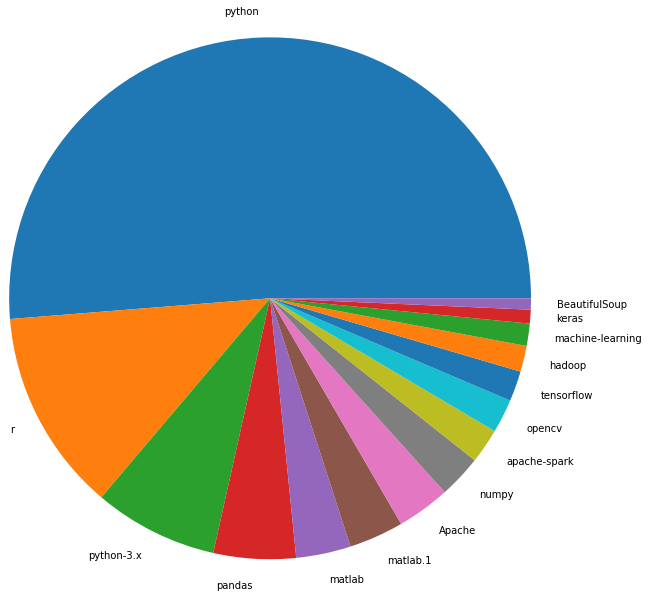

In [ ]:
# plotting top 15 questions in the count
top_questions=sof_question_count.sort_values(ascending=False)[0:15]
plt.pie(top_questions,radius=3,labels=top_questions.index);

In [ ]:
for i in df.index:
    df.loc[i,'year']=df['month'].str.split('-')[i][0]
    df.loc[i,'months']=df['month'].str.split('-')[i][1]

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='year', y='months', z='numpy', color='year')
fig.show()

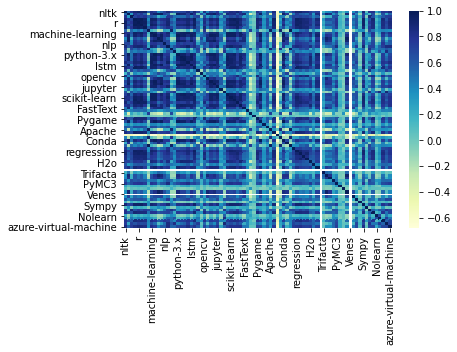

In [ ]:
# plotting correlation of categories
import seaborn as sns
correlation=df.corr()
sns.heatmap(correlation,cmap="YlGnBu")

In [ ]:
# plotting random 5 topics of questions over years

import plotly.graph_objects as go
fig=go.Figure(go.Bar(x=df['year'],y=df['python'],name='python'))
fig.add_trace(go.Bar(x=df['year'],y=df['r'],name='r'))
fig.add_trace(go.Bar(x=df['year'],y=df['tensorflow'],name='tensorflow'))
fig.add_trace(go.Bar(x=df['year'],y=df['pandas'],name='pandas'))
fig.add_trace(go.Bar(x=df['year'],y=df['machine-learning'],name='machine-learning'))

fig.update_layout(barmode='stack',title_text="Count of Questions from the topics over years",xaxis_title="Years",
    yaxis_title="Count")
fig.show()

Timeseries of python topic from dataset

In [ ]:
month_df=df.month
python_df=df.python

In [ ]:
new_df=pd.concat([month_df,python_df],axis=1)

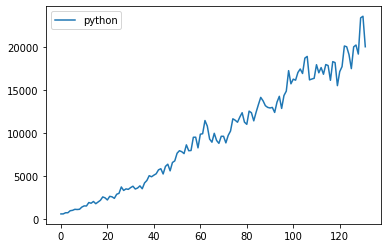

In [ ]:
# plotted timeseries of python data
new_df.plot()

In [ ]:
# Creating moving average of python series data using helper function
def plot_moving_average(series,window):
  rolling_mean=series.rolling(window=window).mean()

  plt.figure(figsize=(17,8))
  plt.title('Moving average \n window size {}'.format(window))
  plt.plot(rolling_mean,'r',label='Rolling mean trend')
  plt.plot(series[window:],label='Actual values')
  plt.legend()
  plt.grid(True)

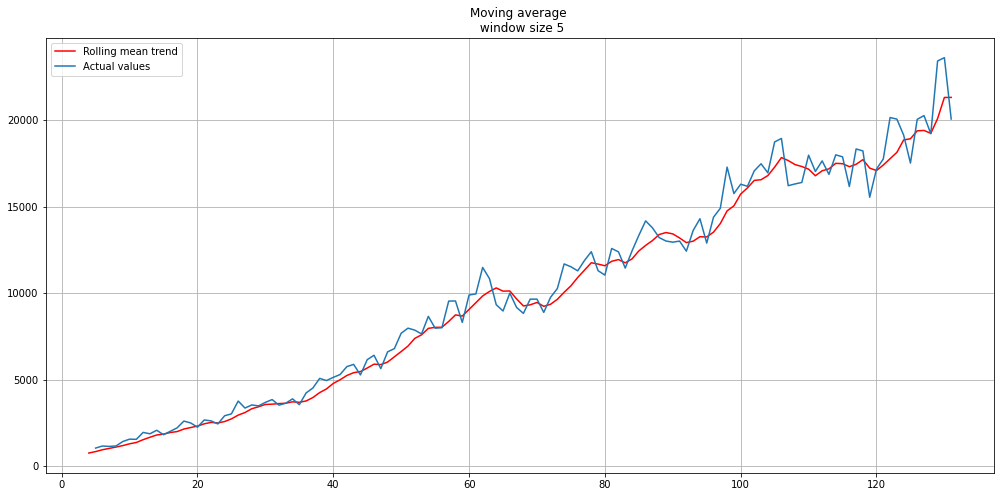

In [ ]:
# plotting moving average window size of 5

plot_moving_average(new_df.python,window=5)

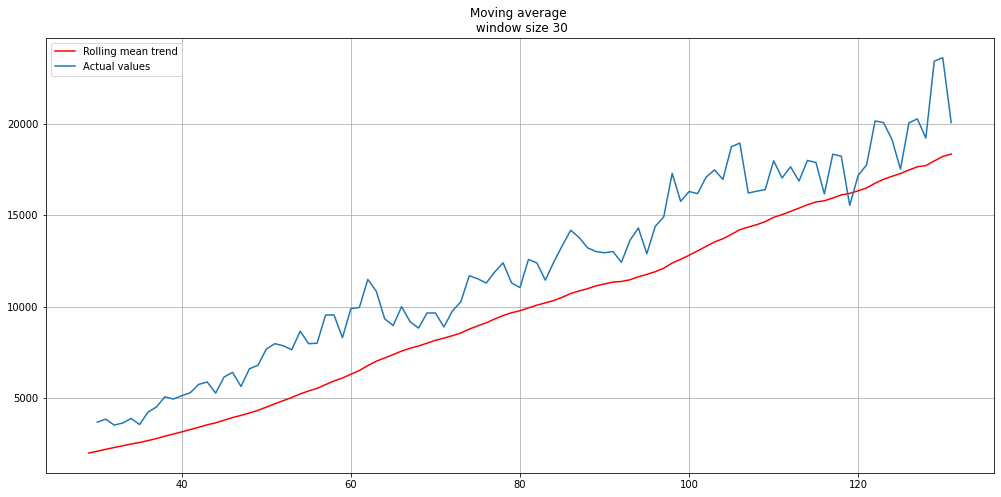

In [ ]:
# plotting moving average window size of 30

plot_moving_average(new_df.python,window=30)

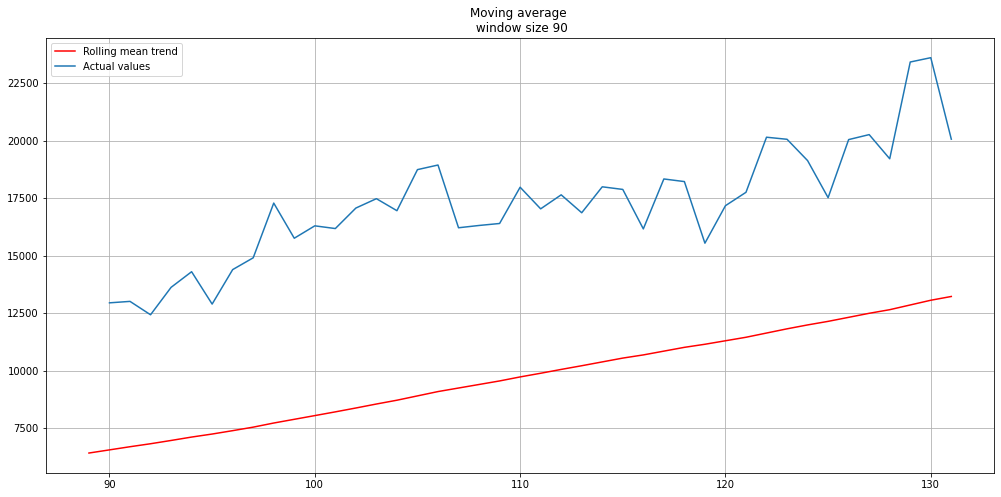

In [ ]:
# plotting moving average window size of 90

plot_moving_average(new_df.python,window=90)

In [ ]:
# let's test whether python timeseries data is stationary or not using famous "Dickey-Fuller Test"

from statsmodels.tsa.stattools import adfuller

test_result=adfuller(new_df['python'])

In [ ]:
test_result

(0.6354247416388465,
 0.9884570085984413,
 13,
 118,
 {'1%': -3.4870216863700767,
  '10%': -2.580009026141913,
  '5%': -2.8863625166643136},
 1856.9782100198688)

In [ ]:
# Using helper function to test stationary or not

def adfuller_test(python):
  print('ADF statistics : %f'%test_result[0])
  print('p-value : %f'%test_result[1])
  print('Critical values :')
  for key , value in test_result[4].items():
    print('\t%s : %.3f'%(key,value))
  if test_result[0]<test_result[4]['5%']:
    print('Data has no unit root and is stationary')
  else:
    print('Data has unit root and is stationary')

In [ ]:
adfuller_test(new_df.python)

ADF statistics : 0.635425
p-value : 0.988457
Critical values :
	1% : -3.487
	5% : -2.886
	10% : -2.580
Data has unit root and is stationary


Hence, Data is stationary. So reject null hypothesis.